## Гаврилов Л.Я. ИУ5-23М

## Обработка признаков (часть 2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
data = pd.read_csv('bike-hour.csv', sep=",")

In [ ]:
data.head()

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,01-01-2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,16
1,2,01-01-2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,40
2,3,01-01-2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,32
3,4,01-01-2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,13
4,5,01-01-2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [ ]:
data.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,143.794448
std,2495.740872,1.105477,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,133.797854
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,31.000000
50%,4323.000000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,109.000000
75%,6484.000000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,211.000000
max,8645.000000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,651.000000


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'cnt'],
      dtype='object')

#Масштабирование

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
data1 = data.drop('cnt', axis=1)
X_ALL = data1.drop('dteday', axis=1)

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['cnt'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((6916, 13), (1729, 13))

##Масштабирование данных на основе Z-оценки

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,-1.731850,-1.369254,-1.626038,-1.675535,-0.168618,1.488982,-1.470386,-0.669287,-1.258356,-1.024616,0.848628,-1.551923,-0.659154
1,-1.731450,-1.369254,-1.626038,-1.530763,-0.168618,1.488982,-1.470386,-0.669287,-1.359400,-1.110613,0.797681,-1.551923,-0.530416
2,-1.731049,-1.369254,-1.626038,-1.385991,-0.168618,1.488982,-1.470386,-0.669287,-1.359400,-1.110613,0.797681,-1.551923,-0.607659
3,-1.730648,-1.369254,-1.626038,-1.241219,-0.168618,1.488982,-1.470386,-0.669287,-1.258356,-1.024616,0.542945,-1.551923,-0.659154
4,-1.730248,-1.369254,-1.626038,-1.096448,-0.168618,1.488982,-1.470386,-0.669287,-1.258356,-1.024616,0.542945,-1.551923,-0.736397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1.730248,-1.369254,1.582879,1.075130,-0.168618,1.488982,-1.470386,-0.669287,-0.348952,-0.253469,-0.526945,0.265681,-0.247192
8641,1.730648,-1.369254,1.582879,1.219901,-0.168618,1.488982,-1.470386,-0.669287,-0.348952,-0.253469,-0.526945,0.265681,-0.530416
8642,1.731049,-1.369254,1.582879,1.364673,-0.168618,1.488982,-1.470386,-0.669287,-0.449997,-0.338900,-0.323156,0.022955,-0.684902
8643,1.731450,-1.369254,1.582879,1.509445,-0.168618,1.488982,-1.470386,-0.669287,-0.551042,-0.424898,-0.119368,-0.461685,-0.684902


In [ ]:
data_cs11_scaled.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03,8.645000e+03
mean,-1.052047e-16,-3.287647e-17,1.315059e-17,3.965724e-17,-5.835574e-17,5.753382e-18,5.999956e-17,1.890397e-17,1.972588e-16,1.183553e-16,-6.871182e-16,6.164338e-17,-1.972588e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-1.731850e+00,-1.369254e+00,-1.626038e+00,-1.675535e+00,-1.686181e-01,-1.501666e+00,-1.470386e+00,-6.692871e-01,-2.369848e+00,-2.653474e+00,-3.278090e+00,-1.551923e+00,-7.363968e-01
25%,-8.659252e-01,-4.646152e-01,-7.508786e-01,-8.069040e-01,-1.686181e-01,-1.003225e+00,-1.470386e+00,-6.692871e-01,-8.541763e-01,-8.531871e-01,-7.816804e-01,-7.035993e-01,-6.591539e-01
50%,0.000000e+00,4.400241e-01,1.242803e-01,6.172688e-02,-1.686181e-01,-6.342227e-03,6.800937e-01,-6.692871e-01,5.522692e-02,8.938946e-02,3.347365e-02,2.295538e-02,-3.759301e-01
75%,8.659252e-01,4.400241e-01,9.994393e-01,9.303577e-01,-1.686181e-01,9.905405e-01,6.800937e-01,8.601834e-01,8.635854e-01,8.611028e-01,8.486277e-01,7.503219e-01,2.420127e-01
max,1.731850e+00,1.344663e+00,1.582879e+00,1.654217e+00,5.930561e+00,1.488982e+00,6.800937e-01,3.919124e+00,2.379257e+00,3.004248e+00,1.816623e+00,5.354000e+00,6.266956e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

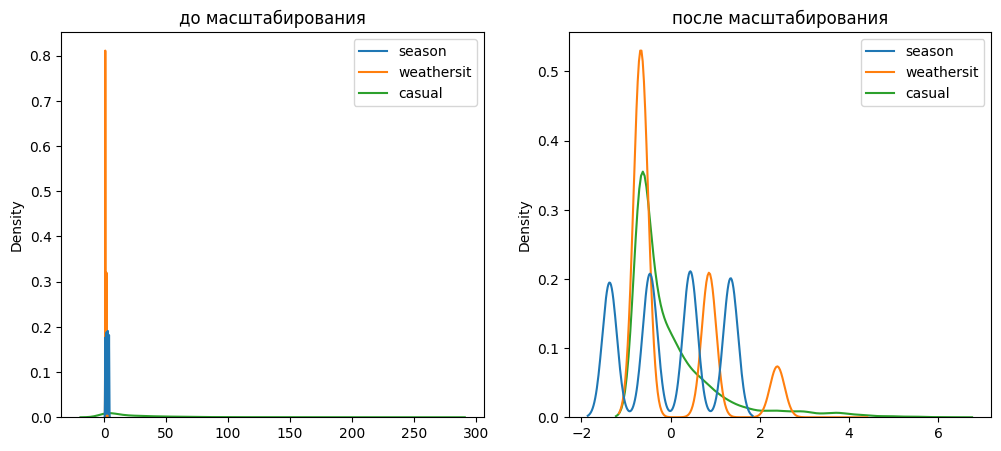

In [ ]:
draw_kde(['season', 'weathersit', 'casual'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03
mean,1.330470e-16,1.307353e-16,9.195138e-17,2.465735e-17,-2.260257e-17,-1.284237e-16,3.904081e-17,-9.400616e-17,-4.006820e-17,5.445166e-17,1.808206e-16,-2.907513e-16,7.191728e-18
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.724531e+00,-1.363995e+00,-1.619885e+00,-1.676533e+00,-1.657853e-01,-1.499744e+00,-1.469992e+00,-6.676050e-01,-2.367586e+00,-2.647696e+00,-3.288740e+00,-1.556399e+00,-7.355122e-01
25%,-8.712143e-01,-4.605000e-01,-7.451195e-01,-8.072194e-01,-1.657853e-01,-1.001606e+00,-1.469992e+00,-6.676050e-01,-8.503489e-01,-8.489803e-01,-7.805225e-01,-7.090772e-01,-6.583654e-01
50%,5.319695e-03,4.429945e-01,1.296465e-01,6.209380e-02,-1.657853e-01,-5.329989e-03,6.802756e-01,-6.676050e-01,5.999331e-02,9.277322e-02,3.848730e-02,1.661976e-02,-3.754938e-01
75%,8.662424e-01,4.429945e-01,1.004412e+00,9.314070e-01,-1.657853e-01,9.909458e-01,6.802756e-01,8.683750e-01,8.691864e-01,8.638127e-01,8.574971e-01,7.431275e-01,2.481094e-01
max,1.735571e+00,1.346489e+00,1.587590e+00,1.655835e+00,6.031897e+00,1.489084e+00,6.802756e-01,3.940335e+00,2.386423e+00,3.005087e+00,1.830071e+00,5.341370e+00,6.259130e+00


In [ ]:
data_cs12_scaled_test.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,0.027599,0.017636,0.027110,0.001592,0.027780,0.005042,0.001244,0.022653,0.023547,0.017309,0.024277,-0.031543,-0.000156
std,0.994776,0.993819,0.997747,1.004211,1.078361,0.997230,0.999797,1.021197,1.005222,0.995794,1.023498,0.993970,0.994054
min,-1.721729,-1.363995,-1.619885,-1.676533,-0.165785,-1.499744,-1.469992,-0.667605,-2.266437,-2.476416,-3.288740,-1.556399,-0.735512
25%,-0.819077,-0.460500,-0.745119,-0.807219,-0.165785,-1.001606,-1.469992,-0.667605,-0.749200,-0.848980,-0.780522,-0.709077,-0.658365
50%,0.007121,0.442994,0.129646,0.062094,-0.165785,-0.005330,0.680276,-0.667605,0.059993,0.092773,0.089675,0.016620,-0.375494
75%,0.903770,0.442994,1.004412,0.931407,-0.165785,0.990946,0.680276,0.868375,0.869186,0.863813,0.857497,0.500688,0.241681
max,1.735171,1.346489,1.587590,1.655835,6.031897,1.489084,0.680276,2.404355,2.386423,2.491249,1.830071,4.494859,5.230507


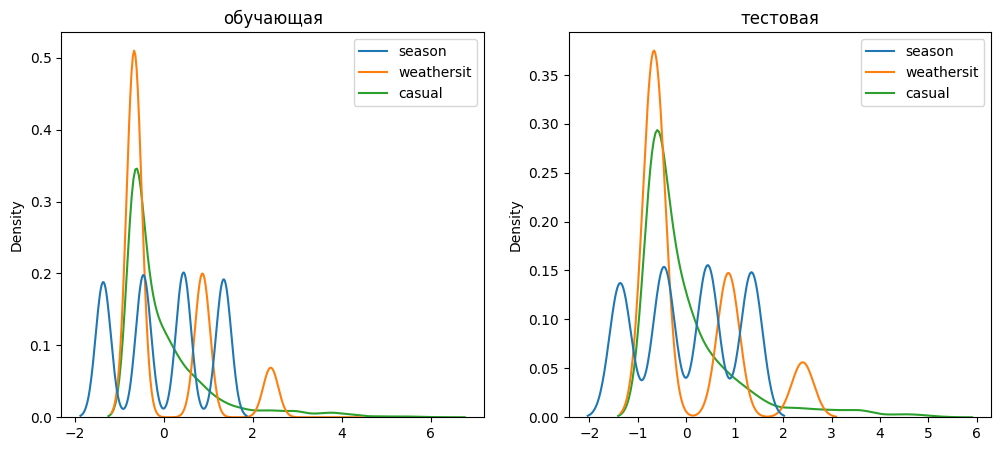

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['season', 'weathersit', 'casual'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

##Масштабирование "Mean Normalisation"

In [ ]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,0.001595,0.001301,0.001690,0.000096,0.000896,0.000337,0.000116,0.000983,0.000991,0.000612,0.000949,-0.000915,-0.000004
std,0.288725,0.368492,0.311650,0.300340,0.163966,0.334395,0.465040,0.217953,0.210578,0.176760,0.196293,0.144812,0.142797
min,-0.498405,-0.503229,-0.505034,-0.503106,-0.026750,-0.501783,-0.683632,-0.144881,-0.498019,-0.468388,-0.642481,-0.225638,-0.105154
25%,-0.248405,-0.169896,-0.232307,-0.242236,-0.026750,-0.335117,-0.683632,-0.144881,-0.178870,-0.150188,-0.152481,-0.102798,-0.094124
50%,0.001595,0.163437,0.040420,0.018634,-0.026750,-0.001783,0.316368,-0.144881,0.012620,0.016412,0.007519,0.002409,-0.053683
75%,0.251595,0.163437,0.313147,0.279503,-0.026750,0.331550,0.316368,0.188452,0.182832,0.152812,0.167519,0.107734,0.034552
max,0.501595,0.496771,0.494966,0.496894,0.973250,0.498217,0.316368,0.855119,0.501981,0.531612,0.357519,0.774362,0.894846


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03,6.916000e+03
mean,3.852711e-17,6.369816e-17,2.825322e-17,1.284237e-17,1.053074e-17,-2.722583e-17,2.773952e-17,-9.246508e-18,-1.181498e-17,9.246508e-18,3.133539e-17,-3.788500e-17,1.348449e-18
std,2.890297e-01,3.689645e-01,3.117942e-01,3.001087e-01,1.613623e-01,3.346036e-01,4.650919e-01,2.170324e-01,2.103640e-01,1.769168e-01,1.953720e-01,1.449849e-01,1.429769e-01
min,-4.984047e-01,-5.032292e-01,-5.050344e-01,-5.031056e-01,-2.674957e-02,-5.017833e-01,-6.836322e-01,-1.448814e-01,-4.980188e-01,-4.683880e-01,-6.424812e-01,-2.256381e-01,-1.051537e-01
25%,-2.517886e-01,-1.698959e-01,-2.323072e-01,-2.422360e-01,-2.674957e-02,-3.351166e-01,-6.836322e-01,-1.448814e-01,-1.788698e-01,-1.501880e-01,-1.524812e-01,-1.027980e-01,-9.412424e-02
50%,1.537438e-03,1.634374e-01,4.042011e-02,1.863354e-02,-2.674957e-02,-1.783304e-03,3.163678e-01,-1.448814e-01,1.261952e-02,1.641196e-02,7.518797e-03,2.409440e-03,-5.368306e-02
75%,2.503516e-01,1.634374e-01,3.131474e-01,2.795031e-01,-2.674957e-02,3.315500e-01,3.163678e-01,1.884519e-01,1.828323e-01,1.528120e-01,1.675188e-01,1.077345e-01,3.547135e-02
max,5.015953e-01,4.967708e-01,4.949656e-01,4.968944e-01,9.732504e-01,4.982167e-01,3.163678e-01,8.551186e-01,5.019812e-01,5.316120e-01,3.575188e-01,7.743619e-01,8.948463e-01


In [ ]:
data_cs22_scaled_test.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,0.007976,0.006507,0.008452,0.000478,0.004482,0.001687,0.000578,0.004916,0.004953,0.003062,0.004743,-0.004573,-0.000022
std,0.287499,0.366657,0.311069,0.301351,0.173994,0.333653,0.464964,0.221617,0.211447,0.176160,0.199948,0.144100,0.142116
min,-0.497595,-0.503229,-0.505034,-0.503106,-0.026750,-0.501783,-0.683632,-0.144881,-0.476742,-0.438088,-0.642481,-0.225638,-0.105154
25%,-0.236720,-0.169896,-0.232307,-0.242236,-0.026750,-0.335117,-0.683632,-0.144881,-0.157593,-0.150188,-0.152481,-0.102798,-0.094124
50%,0.002058,0.163437,0.040420,0.018634,-0.026750,-0.001783,0.316368,-0.144881,0.012620,0.016412,0.017519,0.002409,-0.053683
75%,0.261197,0.163437,0.313147,0.279503,-0.026750,0.331550,0.316368,0.188452,0.182832,0.152812,0.167519,0.072587,0.034552
max,0.501480,0.496771,0.494966,0.496894,0.973250,0.498217,0.316368,0.521785,0.501981,0.440712,0.357519,0.651639,0.747788


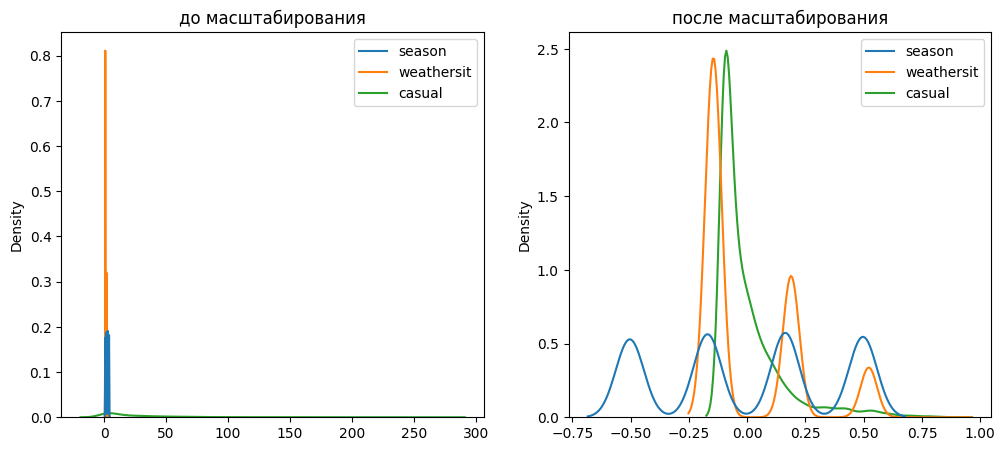

In [ ]:
draw_kde(['season', 'weathersit', 'casual'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

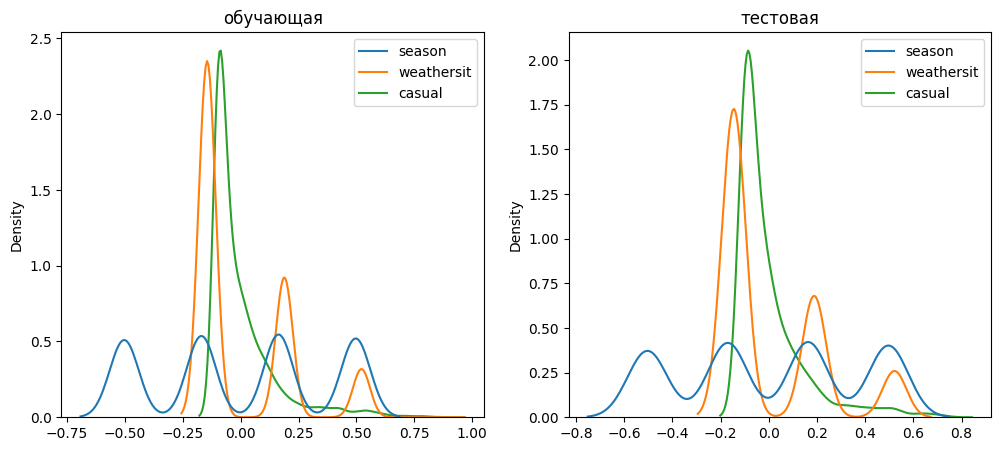

In [ ]:
draw_kde(['season', 'weathersit', 'casual'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')


##MinMax-масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000
mean,0.500000,0.504531,0.506725,0.503201,0.027646,0.502121,0.683748,0.145865,0.499009,0.46900,0.643430,0.224723,0.105149
std,0.288725,0.368492,0.311650,0.300340,0.163966,0.334395,0.465040,0.217953,0.210578,0.17676,0.196293,0.144812,0.142797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.272727,0.260870,0.000000,0.166667,0.000000,0.000000,0.319149,0.31820,0.490000,0.122840,0.011029
50%,0.500000,0.666667,0.545455,0.521739,0.000000,0.500000,1.000000,0.000000,0.510638,0.48480,0.650000,0.228047,0.051471
75%,0.750000,0.666667,0.818182,0.782609,0.000000,0.833333,1.000000,0.333333,0.680851,0.62120,0.810000,0.333373,0.139706
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

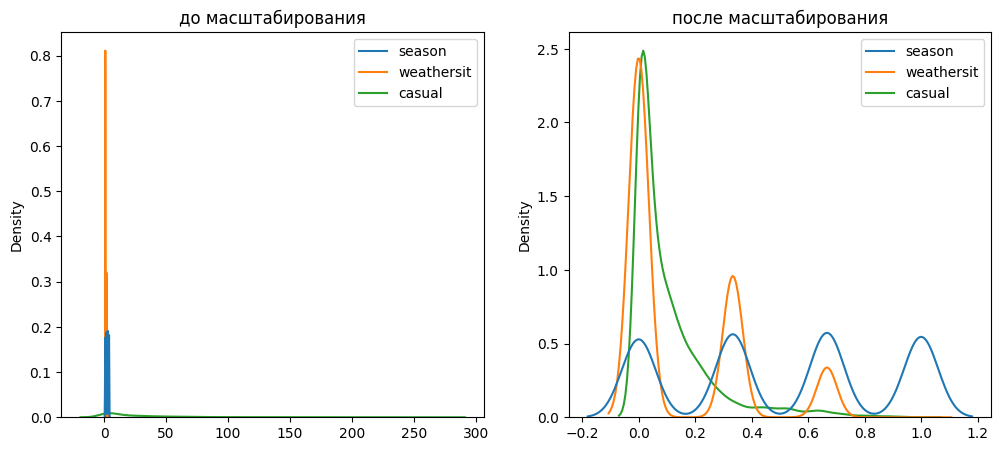

In [ ]:
draw_kde(['season', 'weathersit', 'casual'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')


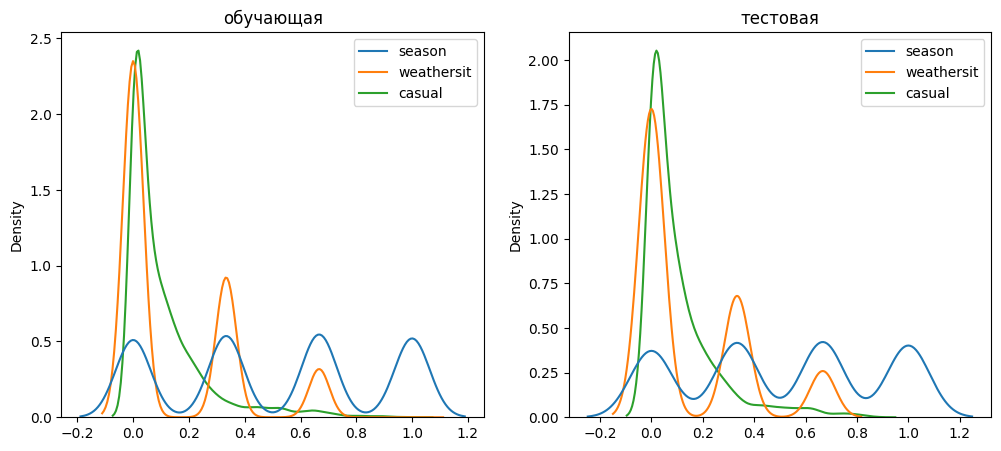

In [ ]:
draw_kde(['season', 'weathersit', 'casual'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')


#Обработка выбросов

##Удаление выбросов

In [ ]:
data = pd.read_csv('games.csv', sep=",")

In [ ]:
data = data.drop('Publisher', 1)
data = data.drop('Unnamed: 0', 1)
data = data.dropna(axis=0, subset=['Name', 'SteamURL'])
data.shape


<ipython-input-88-aefd0e2a8e93>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Publisher', 1)
<ipython-input-88-aefd0e2a8e93>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Unnamed: 0', 1)


(30101, 25)

In [ ]:
x_col_list = ['Metacritic']

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


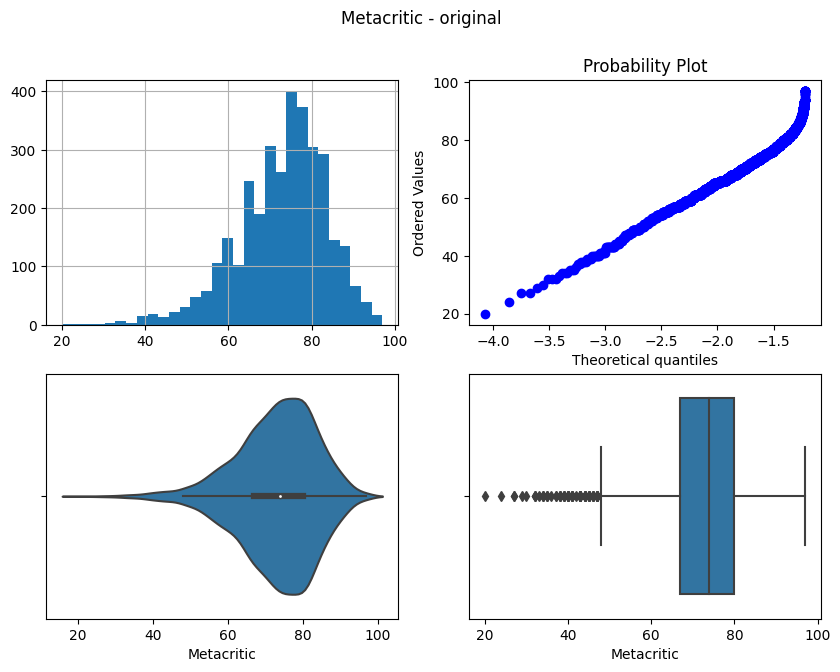

In [ ]:
diagnostic_plots(data, 'Metacritic', 'Metacritic - original')

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


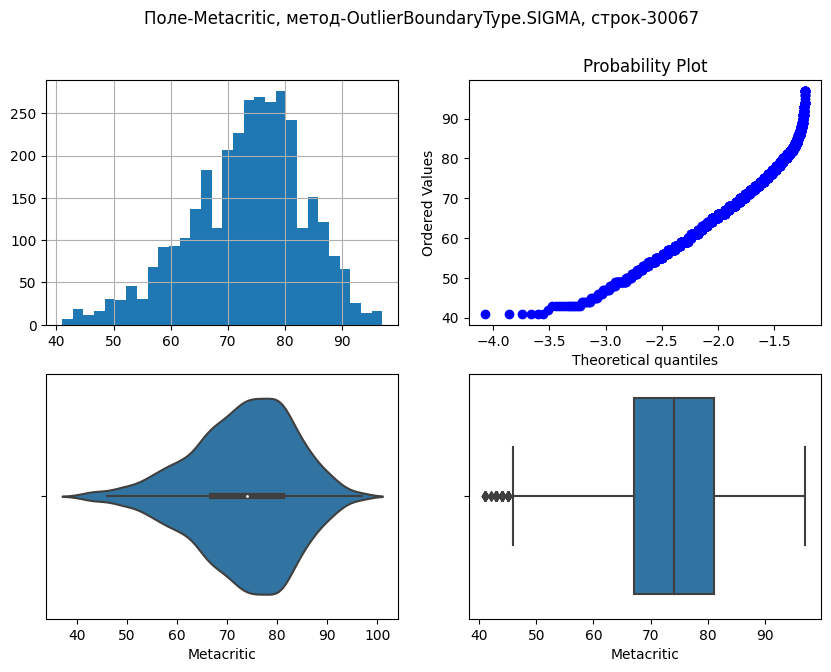

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


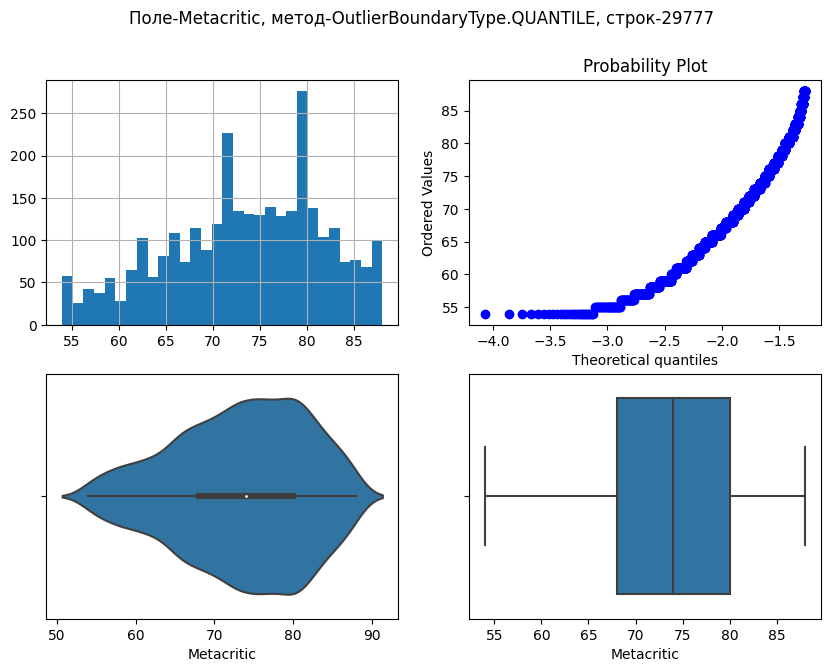

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


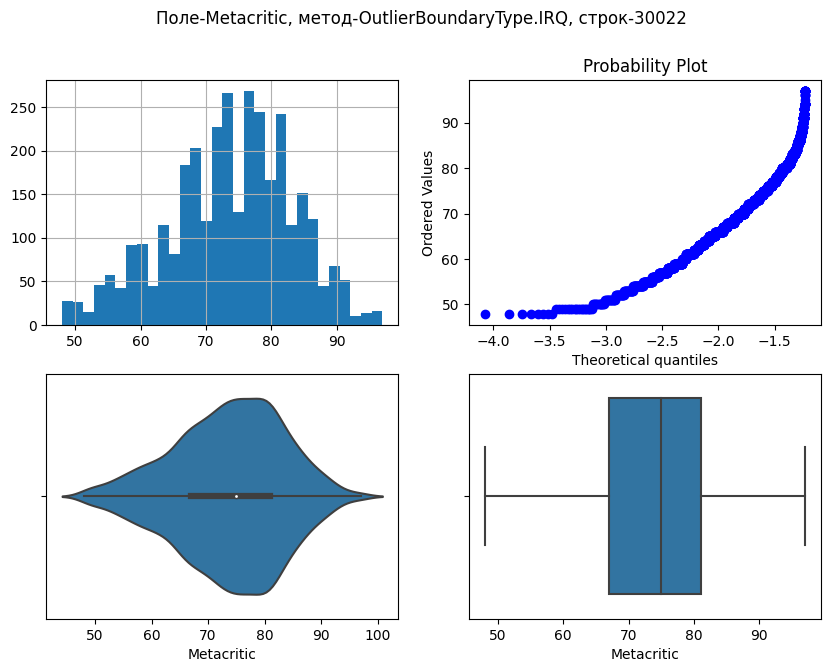

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

##Замена выбросов

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


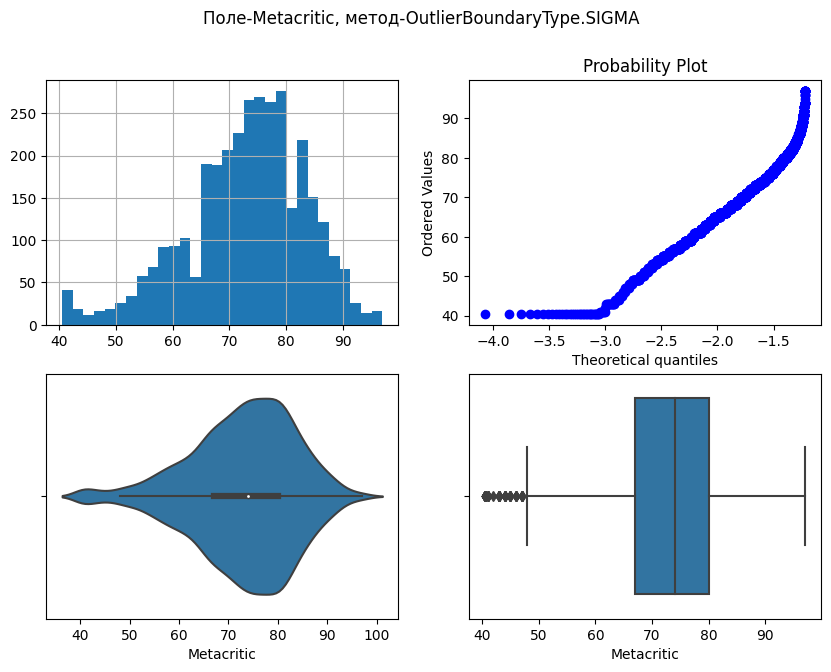

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


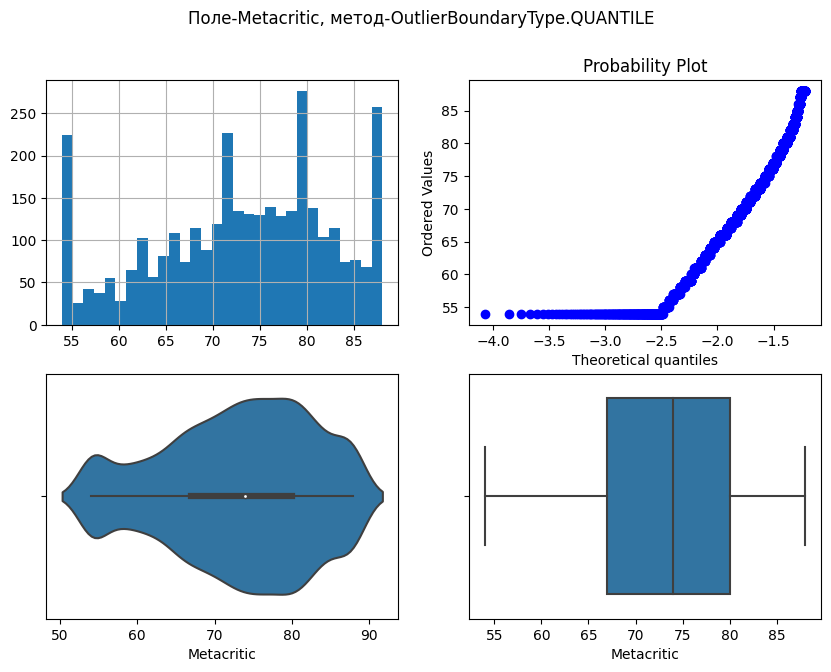

<ipython-input-82-2de3f422987c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


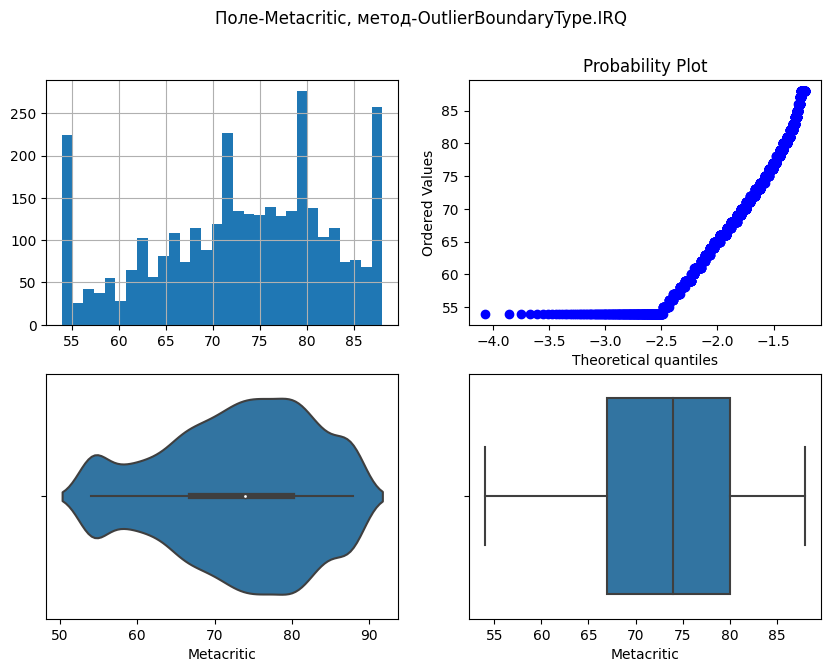

In [ ]:
for col in x_col_list:
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary,
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

#Обработка нестандартного признака

In [ ]:
data = pd.read_csv('bike-hour.csv', sep=",")

In [ ]:
data

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,01-01-2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,16
1,2,01-01-2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,40
2,3,01-01-2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,32
3,4,01-01-2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,13
4,5,01-01-2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,31-12-2011,1,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,92
8641,8642,31-12-2011,1,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,71
8642,8643,31-12-2011,1,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,52
8643,8644,31-12-2011,1,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,38


In [ ]:
data.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
cnt             int64
dtype: object

In [ ]:
data = data.drop('season', 1)
data = data.drop('mnth', 1)
data = data.drop('holiday', 1)
data = data.drop('weekday', 1)
data = data.drop('workingday', 1)
data.shape

<ipython-input-38-bb9f60cb547b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('season', 1)
<ipython-input-38-bb9f60cb547b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('mnth', 1)
<ipython-input-38-bb9f60cb547b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('holiday', 1)
<ipython-input-38-bb9f60cb547b>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('weekday', 1)
<ipython-input-38-bb9f60cb547b>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('workingday', 1)


(8645, 10)

In [ ]:
# Сконвертируем дату и время в нужный формат
data['dt'] = data.apply(lambda x: pd.to_datetime(x['dteday'], format='%d-%m-%Y'), axis=1)

In [ ]:
data.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt,dt
0,1,01-01-2011,0,1,0.24,0.2879,0.81,0.0,3,16,2011-01-01
1,2,01-01-2011,1,1,0.22,0.2727,0.80,0.0,8,40,2011-01-01
2,3,01-01-2011,2,1,0.22,0.2727,0.80,0.0,5,32,2011-01-01
3,4,01-01-2011,3,1,0.24,0.2879,0.75,0.0,3,13,2011-01-01
4,5,01-01-2011,4,1,0.24,0.2879,0.75,0.0,0,1,2011-01-01


In [ ]:
data.dtypes

instant                int64
dteday                object
hr                     int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
cnt                    int64
dt            datetime64[ns]
dtype: object

In [ ]:
# День
data['day'] = data['dt'].dt.day
# Месяц
data['month'] = data['dt'].dt.month
# Год
data['year'] = data['dt'].dt.year
#Неделя года
data['week'] = data['dt'].dt.isocalendar().week
#Квартал
data['quarter'] = data['dt'].dt.quarter
#День недели
data['dayofweek'] = data['dt'].dt.dayofweek
#Выходной день
data['day_name'] = data['dt'].dt.day_name()
data['is_holiday'] = data.apply(lambda x: 1 if x['dt'].dayofweek in [5,6] else 0, axis=1)

In [ ]:
data.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt,dt,day,month,year,week,quarter,dayofweek,day_name,is_holiday
0,1,01-01-2011,0,1,0.24,0.2879,0.81,0.0,3,16,2011-01-01,1,1,2011,52,1,5,Saturday,1
1,2,01-01-2011,1,1,0.22,0.2727,0.80,0.0,8,40,2011-01-01,1,1,2011,52,1,5,Saturday,1
2,3,01-01-2011,2,1,0.22,0.2727,0.80,0.0,5,32,2011-01-01,1,1,2011,52,1,5,Saturday,1
3,4,01-01-2011,3,1,0.24,0.2879,0.75,0.0,3,13,2011-01-01,1,1,2011,52,1,5,Saturday,1
4,5,01-01-2011,4,1,0.24,0.2879,0.75,0.0,0,1,2011-01-01,1,1,2011,52,1,5,Saturday,1


In [ ]:
# Разница между датами
data['now'] = datetime.datetime.today()
data['diff'] = data['now'] - data['dt']
data.dtypes

instant                 int64
dteday                 object
hr                      int64
weathersit              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
cnt                     int64
dt             datetime64[ns]
day                     int64
month                   int64
year                    int64
week                   UInt32
quarter                 int64
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [ ]:
data.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt,...,day,month,year,week,quarter,dayofweek,day_name,is_holiday,now,diff
0,1,01-01-2011,0,1,0.24,0.2879,0.81,0.0,3,16,...,1,1,2011,52,1,5,Saturday,1,2023-04-02 16:35:24.795190,4474 days 16:35:24.795190
1,2,01-01-2011,1,1,0.22,0.2727,0.80,0.0,8,40,...,1,1,2011,52,1,5,Saturday,1,2023-04-02 16:35:24.795190,4474 days 16:35:24.795190
2,3,01-01-2011,2,1,0.22,0.2727,0.80,0.0,5,32,...,1,1,2011,52,1,5,Saturday,1,2023-04-02 16:35:24.795190,4474 days 16:35:24.795190
3,4,01-01-2011,3,1,0.24,0.2879,0.75,0.0,3,13,...,1,1,2011,52,1,5,Saturday,1,2023-04-02 16:35:24.795190,4474 days 16:35:24.795190
4,5,01-01-2011,4,1,0.24,0.2879,0.75,0.0,0,1,...,1,1,2011,52,1,5,Saturday,1,2023-04-02 16:35:24.795190,4474 days 16:35:24.795190


#Отбор признаков

##Отбор признаков из группы методом фильтрации (корреляция признаков)

In [ ]:
data = pd.read_csv('bike-hour.csv', sep=",")

Text(0.5, 1.0, 'Корреляционная матрица для всех колонок')

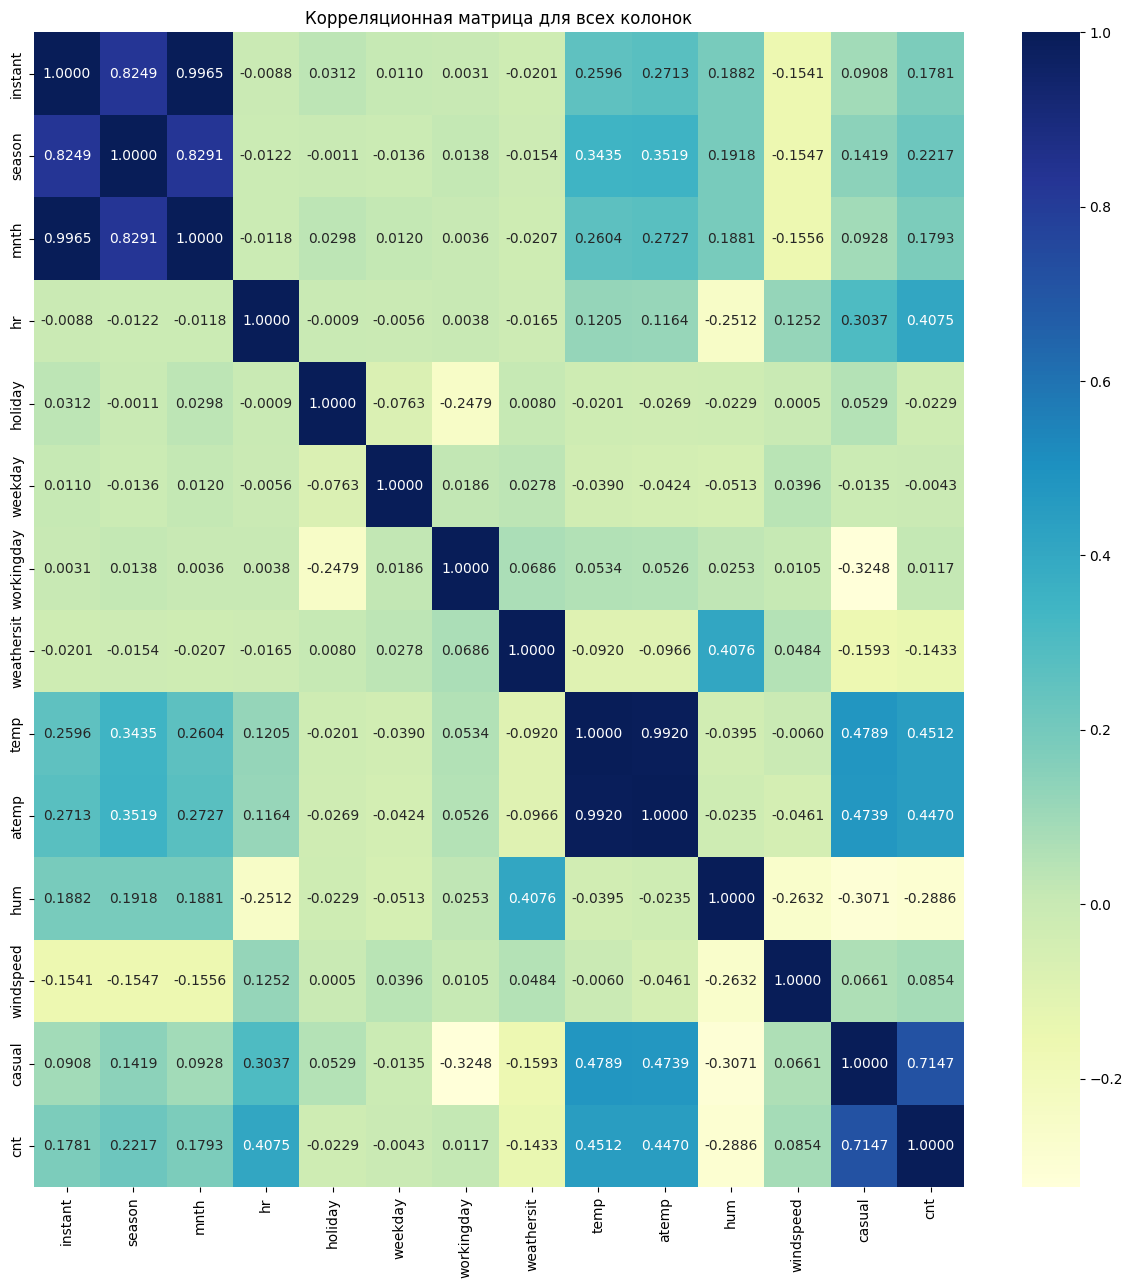

In [ ]:
col_ch=['instant', 'dteday', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual','cnt']
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data[col_ch].corr(), annot=True, fmt='.4f', cmap="YlGnBu")
ax.set_title('Корреляционная матрица для всех колонок')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.45]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data)

,f1,f2,corr
0,instant,mnth,0.996461
1,mnth,instant,0.996461
2,temp,atemp,0.992022
3,atemp,temp,0.992022
4,season,mnth,0.829054
5,mnth,season,0.829054
6,season,instant,0.824925
7,instant,season,0.824925
8,cnt,casual,0.714742
9,casual,cnt,0.714742


In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['mnth', 'season', 'instant'], ['atemp', 'casual', 'cnt', 'temp']]

##Отбор признаков из группы методом обертывания (алгоритм полного перебора)

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
col_ch=['season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual']

In [ ]:
iris_X = data[col_ch]
iris_y = data['cnt']
iris_feature_names = col_ch

In [ ]:
efs1 = EFS(knn,
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 78/78

Best subset (indices): (2, 11)
Best subset (corresponding names): ('hr', 'casual')


##Отбор признаков из группы методов вложения (логистическая регрессия)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(iris_X, iris_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-1.79803706e-01, -7.48908923e-02, -1.70834448e-01, ...,
         5.41522385e-01,  1.94308626e+00, -1.65263659e+00],
       [-3.08821362e-01,  3.75976134e-03, -1.68993067e-01, ...,
         1.26470983e-01, -4.68818557e-01, -1.11936699e+00],
       [-9.77261731e-02,  6.76173561e-03, -1.66651060e-01, ...,
        -1.25060669e-01, -7.10751734e-01, -8.62844296e-01],
       ...,
       [-4.87437825e-01,  2.59064130e+00,  1.37191532e-01, ...,
         5.34606024e+00,  3.62448873e+00,  3.92293263e-02],
       [-3.63688746e+01,  3.57562898e+00,  1.77341113e+00, ...,
        -1.53237722e+02, -9.47353916e+01,  4.10587087e-01],
       [-2.11368802e+00,  1.10130679e+00, -1.87572443e+00, ...,
        -6.04493952e+01, -7.86759346e+01,  2.20013824e-01]])

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(iris_X, iris_y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
list(zip(col_ch, sel_e_lr1.get_support()))

[('season', True),
 ('mnth', True),
 ('hr', True),
 ('holiday', True),
 ('weekday', True),
 ('workingday', True),
 ('weathersit', True),
 ('temp', True),
 ('atemp', True),
 ('hum', True),
 ('windspeed', True),
 ('casual', True)]